<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_4X/blob/main/GQtest_cluster_data(y_hat)_multi_delta_(1_6)_n20_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_4X/multiplication_delta_1.6'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_1.6_n20.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,96.752107,60.482065,68.456756,21.873232,10.004756,267.568916,238.909575,28.659341
1,0.0,1.0,74.440283,20.957141,92.136017,59.963883,-4.815273,252.682052,253.484180,-0.802128
2,0.0,2.0,87.542934,83.254483,48.735176,29.690757,-63.137015,196.086335,246.215205,-50.128870
3,0.0,3.0,93.942006,20.986682,30.863303,96.925288,25.939583,278.656862,274.027346,4.629516
4,0.0,4.0,50.462659,99.152509,31.126594,71.235860,38.339336,300.316958,269.503148,30.813810
...,...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,78.358877,27.301859,81.604118,59.222665,-20.211007,236.276511,258.369707,-22.093196
19996,999.0,16.0,91.082950,43.543065,54.153293,92.366386,5.931373,297.077067,304.273424,-7.196357
19997,999.0,17.0,55.289655,87.439403,32.513948,72.551612,-39.417833,218.376785,269.568877,-51.192093
19998,999.0,18.0,98.160360,42.921147,68.651809,71.096603,-8.904374,281.925545,309.769021,-27.843476


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         x4          e  \
rep   index                                                          
0.0   0.0    96.752107  60.482065  68.456756  21.873232  10.004756   
      1.0    74.440283  20.957141  92.136017  59.963883  -4.815273   
      2.0    87.542934  83.254483  48.735176  29.690757 -63.137015   
      3.0    93.942006  20.986682  30.863303  96.925288  25.939583   
      4.0    50.462659  99.152509  31.126594  71.235860  38.339336   
...                ...        ...        ...        ...        ...   
999.0 15.0   78.358877  27.301859  81.604118  59.222665 -20.211007   
      16.0   91.082950  43.543065  54.153293  92.366386   5.931373   
      17.0   55.289655  87.439403  32.513948  72.551612 -39.417833   
      18.0   98.160360  42.921147  68.651809  71.096603  -8.904374   
      19.0   69.671747  33.187393  87.872462  46.818825  20.162654   

                      Y       y_hat      e_hat  
rep   index                                     
0.0   0.0    267.568916  238.909575  28.659341  
      1.0    252.682052  253.484180  -0.802128  
      2.0    196.086335  246.215205 -50.128870  
      3.0    278.656862  274.027346   4.629516  
      4.0    300.316958  269.503148  30.813810  
...                 ...         ...        ...  
999.0 15.0   236.276511  258.369707 -22.093196  
      16.0   297.077067  304.273424  -7.196357  
      17.0   218.376785  269.568877 -51.192093  
      18.0   281.925545  309.769021 -27.843476  
      19.0   267.713081  248.899313  18.813768  

[20000 rows x 8 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         x4          e  \
rep   index                                                          
0.0   0.0    96.752107  60.482065  68.456756  21.873232  10.004756   
      1.0    74.440283  20.957141  92.136017  59.963883  -4.815273   
      2.0    87.542934  83.254483  48.735176  29.690757 -63.137015   
      3.0    93.942006  20.986682  30.863303  96.925288  25.939583   
      4.0    50.462659  99.152509  31.126594  71.235860  38.339336   
...                ...        ...        ...        ...        ...   
999.0 15.0   78.358877  27.301859  81.604118  59.222665 -20.211007   
      16.0   91.082950  43.543065  54.153293  92.366386   5.931373   
      17.0   55.289655  87.439403  32.513948  72.551612 -39.417833   
      18.0   98.160360  42.921147  68.651809  71.096603  -8.904374   
      19.0   69.671747  33.187393  87.872462  46.818825  20.162654   

                      Y       y_hat      e_hat  
rep   index                                     
0.0   0.0    267.568916  238.909575  28.659341  
      1.0    252.682052  253.484180  -0.802128  
      2.0    196.086335  246.215205 -50.128870  
      3.0    278.656862  274.027346   4.629516  
      4.0    300.316958  269.503148  30.813810  
...                 ...         ...        ...  
999.0 15.0   236.276511  258.369707 -22.093196  
      16.0   297.077067  304.273424  -7.196357  
      17.0   218.376785  269.568877 -51.192093  
      18.0   281.925545  309.769021 -27.843476  
      19.0   267.713081  248.899313  18.813768  

[20000 rows x 8 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,96.752107,60.482065,68.456756,21.873232,10.004756,267.568916,238.909575,28.659341
1,0.0,1.0,74.440283,20.957141,92.136017,59.963883,-4.815273,252.682052,253.484180,-0.802128
2,0.0,2.0,87.542934,83.254483,48.735176,29.690757,-63.137015,196.086335,246.215205,-50.128870
3,0.0,3.0,93.942006,20.986682,30.863303,96.925288,25.939583,278.656862,274.027346,4.629516
4,0.0,4.0,50.462659,99.152509,31.126594,71.235860,38.339336,300.316958,269.503148,30.813810
...,...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,78.358877,27.301859,81.604118,59.222665,-20.211007,236.276511,258.369707,-22.093196
19996,999.0,16.0,91.082950,43.543065,54.153293,92.366386,5.931373,297.077067,304.273424,-7.196357
19997,999.0,17.0,55.289655,87.439403,32.513948,72.551612,-39.417833,218.376785,269.568877,-51.192093
19998,999.0,18.0,98.160360,42.921147,68.651809,71.096603,-8.904374,281.925545,309.769021,-27.843476


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         x3         x4          e  \
rep   index                                                          
0.0   0.0    96.752107  60.482065  68.456756  21.873232  10.004756   
      1.0    74.440283  20.957141  92.136017  59.963883  -4.815273   
      2.0    87.542934  83.254483  48.735176  29.690757 -63.137015   
      3.0    93.942006  20.986682  30.863303  96.925288  25.939583   
      4.0    50.462659  99.152509  31.126594  71.235860  38.339336   
...                ...        ...        ...        ...        ...   
999.0 15.0   78.358877  27.301859  81.604118  59.222665 -20.211007   
      16.0   91.082950  43.543065  54.153293  92.366386   5.931373   
      17.0   55.289655  87.439403  32.513948  72.551612 -39.417833   
      18.0   98.160360  42.921147  68.651809  71.096603  -8.904374   
      19.0   69.671747  33.187393  87.872462  46.818825  20.162654   

                      Y       y_hat      e_hat  
rep   index                                     
0.0   0.0    267.568916  238.909575  28.659341  
      1.0    252.682052  253.484180  -0.802128  
      2.0    196.086335  246.215205 -50.128870  
      3.0    278.656862  274.027346   4.629516  
      4.0    300.316958  269.503148  30.813810  
...                 ...         ...        ...  
999.0 15.0   236.276511  258.369707 -22.093196  
      16.0   297.077067  304.273424  -7.196357  
      17.0   218.376785  269.568877 -51.192093  
      18.0   281.925545  309.769021 -27.843476  
      19.0   267.713081  248.899313  18.813768  

[20000 rows x 8 columns]

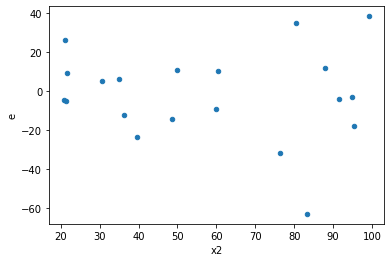

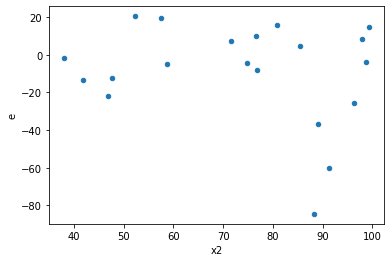

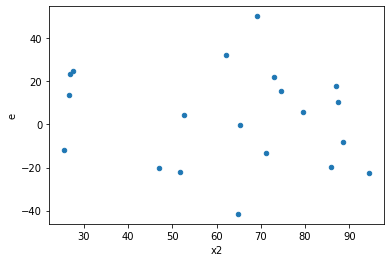

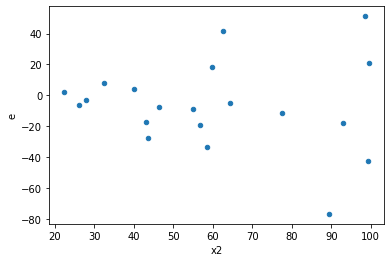

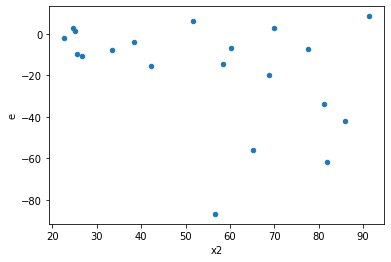

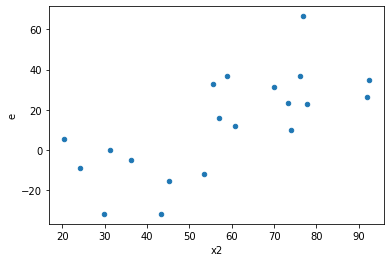

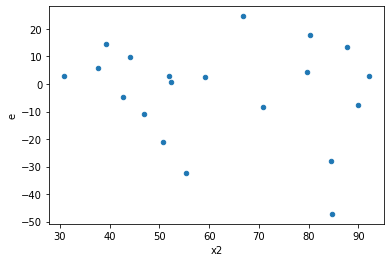

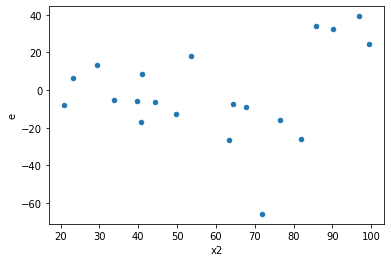

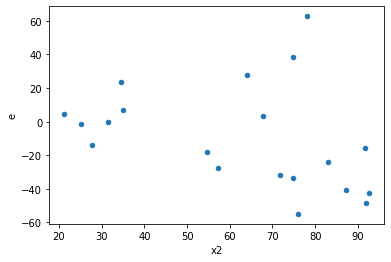

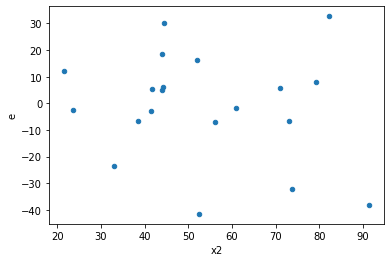

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["y_hat"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
2.0,6.0,6.0,2810.556203364537,3578.68289529022,468.42603389408947,596.4471492150367,1.2733005982965768,0.7767464595075027,0.6116267702462487,0.3883732297537513,Reject001=1 : Homoscedasticity
9.0,7.0,5.0,1241.7044990510494,2821.37121642835,177.3863570072928,564.2742432856701,3.1810464615521212,0.2211077475585148,0.8894461262207426,0.1105538737792574,Reject001=1 : Homoscedasticity
10.0,8.0,4.0,1444.5032998334982,979.1329569655335,180.56291247918728,244.78323924138337,1.3556673177256071,0.8163005111201445,0.5918497444399278,0.40815025556007223,Reject001=1 : Homoscedasticity
12.0,4.0,8.0,1771.8793448508707,4353.990263847222,442.96983621271767,544.2487829809028,1.2286362151294432,0.7427599888468994,0.6286200055765503,0.3713799944234497,Reject001=1 : Homoscedasticity
18.0,5.0,7.0,132.75068028609812,8356.435177857773,26.550136057219625,1193.776453979682,44.96310118362144,7.166345940956553e-05,0.9999641682702952,3.5831729704782767e-05,Reject001=0 : Heteroscedasticity
21.0,7.0,5.0,1946.914389903443,3293.450912896349,278.13062712906327,658.6901825792698,2.3682763361174617,0.35963846064361116,0.8201807696781944,0.17981923032180558,Reject001=1 : Homoscedasticity
27.0,8.0,4.0,3438.90688328474,2223.9912574863192,429.8633604105925,555.9978143715798,1.2934291814043128,0.8555114920981861,0.572244253950907,0.42775574604909306,Reject001=1 : Homoscedasticity
28.0,5.0,7.0,2459.610961279372,3738.3604121133885,491.9221922558744,534.0514874447698,1.08564219271283,0.8868719154997453,0.5565640422501273,0.44343595774987266,Reject001=1 : Homoscedasticity
30.0,6.0,6.0,638.7155700438407,1942.0673190343566,106.45259500730678,323.6778865057261,3.040582397108396,0.2017702707848903,0.8991148646075549,0.10088513539244515,Reject001=1 : Homoscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,12.0,1.0,5249.818158007176,1.185840956277192e-24,437.484846500598,1.185840956277192e-24,2.710587499801713e-27,5.343306447082321e-154,Reject001=0 : Heteroscedasticity
1.0,9.0,3.0,6007.741252407823,257.7026347891791,667.5268058230914,85.90087826305971,0.12868528651391004,0.014434610908428971,Reject001=1 : Homoscedasticity
2.0,6.0,6.0,2810.556203364537,3578.68289529022,468.42603389408947,596.4471492150367,1.2733005982965768,0.7767464595075027,Reject001=1 : Homoscedasticity
3.0,11.0,1.0,12512.466114418718,4.840153650300276e-22,1137.4969194926107,4.840153650300276e-22,4.255091655509066e-25,2.2859970936352698e-129,Reject001=0 : Heteroscedasticity
4.0,11.0,1.0,6404.539236154898,9.669288996347404e-25,582.2308396504453,9.669288996347404e-25,1.660731163287841e-27,1.2933705303396604e-142,Reject001=0 : Heteroscedasticity
5.0,10.0,2.0,1450.871466720799,313.2034352485466,145.08714667207988,156.6017176242733,1.0793631359931435,0.8548673669564378,Reject001=1 : Homoscedasticity
6.0,5.0,7.0,1871.8741554463847,1321.0075412022668,374.37483108927694,188.71536302889527,0.5040813306808343,0.46823934467155787,Reject001=1 : Homoscedasticity
7.0,9.0,3.0,2314.7323616060103,845.6284092709585,257.19248462289005,281.87613642365284,1.0959734567553765,0.9455477075109773,Reject001=1 : Homoscedasticity
8.0,7.0,5.0,3340.9906310641045,2422.089062370001,477.28437586630065,484.41781247400024,1.014945883352565,0.9762793707859383,Reject001=1 : Homoscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      752
Reject001=0 : Heteroscedasticity    248
Name: Result_test, dtype: int64